**О наборе данных**

Параметры вычисляются на основе оцифрованного изображения тонкоигольной аспирационной биопсии (FNA) образования в молочной железе. Они описывают характеристики клеточных ядер, присутствующих на изображении.  

Для каждого изображения были вычислены среднее значение (признаки с добавлением номера 1), стандартная ошибка (признаки с добавлением номера 2)и «наихудшее» или наибольшее (среднее значение из трёх наибольших значений) - признаки с добавлением номера 3.  

**EDA**

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1


  1) diagnosis - диагноз (таргетный признак, M (malignant) - злокачественный, B (benign) - доброкачественный)
  2) radius - радиус (среднее значение расстояний от центра до точек периметра)  
  3) texture - текстура (стандартное отклонение значений шкалы серого)  
  4) perimeter - периметр  
  5) area - площадь  
  6) smoothness - гладкость (локальное изменение длины радиусов)  
  7) compactness - компактность (периметр^2/площадь - 1,0)  
  8) concavity - вогнутость (выраженность вогнутых участков контура)  
  9) concave points вогнутые точки (количество вогнутых участков контура)  
  10) symmetry - симметрия  
  11) fractal dimension - фрактальная размерность («приближение береговой линии» - 1)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Считываем датасет
data = pd.read_csv('https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data.csv')
data.head(10).T # выведем первые 10 строк таблицы, для удобства транспонируем ее

,0,1,2,3,4,5,6,7,8,9
842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,845636
M,M,M,M,M,M,M,M,M,M,M
17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,16.02
10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,23.24
122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,102.7
1001,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,797.8
0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,0.08206
0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,0.06669
0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,0.03299
0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,0.03323


In [ ]:
# Посмотрим размерность датафрейма
data.shape

(568, 32)

568 строк, 32 колонки

In [ ]:
# Посмотрим информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

Нет пропущенных значений. Типы данных 31 столбца - числовые (float64(30), int64(1)), 1 столбец представлен типом данных object

In [4]:
# Удалим первую колонку, соответствующую ID
data = data.drop(data.columns[0], axis=1)
data.head().T

,0,1,2,3,4
M,M,M,M,M,M
17.99,20.57,19.69,11.42,20.29,12.45
10.38,17.77,21.25,20.38,14.34,15.7
122.8,132.9,130.0,77.58,135.1,82.57
1001,1326.0,1203.0,386.1,1297.0,477.1
0.1184,0.08474,0.1096,0.1425,0.1003,0.1278
0.2776,0.07864,0.1599,0.2839,0.1328,0.17
0.3001,0.0869,0.1974,0.2414,0.198,0.1578
0.1471,0.07017,0.1279,0.1052,0.1043,0.08089
0.2419,0.1812,0.2069,0.2597,0.1809,0.2087


In [5]:
# Переименуем колонки согласно представленной информации о названии признаков
data.columns = ['diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
                'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
                'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
data.head().T

,0,1,2,3,4
diagnosis,M,M,M,M,M
radius1,20.57,19.69,11.42,20.29,12.45
texture1,17.77,21.25,20.38,14.34,15.7
perimeter1,132.9,130.0,77.58,135.1,82.57
area1,1326.0,1203.0,386.1,1297.0,477.1
smoothness1,0.08474,0.1096,0.1425,0.1003,0.1278
compactness1,0.07864,0.1599,0.2839,0.1328,0.17
concavity1,0.0869,0.1974,0.2414,0.198,0.1578
concave_points1,0.07017,0.1279,0.1052,0.1043,0.08089
symmetry1,0.1812,0.2069,0.2597,0.1809,0.2087


In [ ]:
# Посмотрим на количество уникальных значений в столбцах
data.nunique()

,0
diagnosis,2
radius1,456
texture1,478
perimeter1,521
area1,538
smoothness1,473
compactness1,536
concavity1,536
concave_points1,542
symmetry1,431


Таргетный признак diagnosis имеет 2 уникальных значения, в остальных столбцах уникальные значения составляют подавляющее большинство

In [ ]:
# Посмотрим на уникальные значения таргетного признака diagnosis
diagnosis_counts = data['diagnosis'].unique()
print(diagnosis_counts)

['M' 'B']


2 уникальных значения:  
M - malignant (злокачетсвенная опухоль)  
B - benign (доброкачественная опухоль)

Посмотрим, есть ли дубликаты в датафрейме

In [ ]:
duplicates = data[data.duplicated(keep=False)]  # keep=False показывает все дубликаты

# Проверим, есть ли дубликаты и выведем их
if not duplicates.empty:
    print("Дубликаты в DataFrame:")
    print(duplicates)
else:
    print("Дубликатов нет")

Дубликатов нет


Значения параметров ядра опухолевой клетки

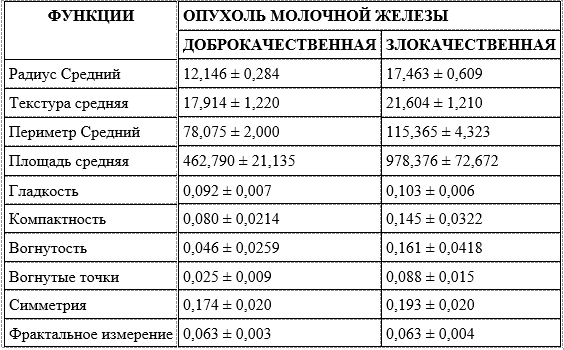

Посмотрим, есть ли значения, равные 0

In [ ]:
# Посмотрим, есть ли значения, равные 0, в числовых столбцах
null_counts = data.select_dtypes(include=['number']).eq(0).sum()
print("\nКоличество значений равных 0 в числовых столбцах:")
print(null_counts)


Количество значений равных 0 в числовых столбцах:
radius1                0
texture1               0
perimeter1             0
area1                  0
 smoothness1           0
compactness1           0
concavity1            13
concave_points1       13
symmetry1              0
fractal_dimension1     0
radius2                0
texture2               0
perimeter2             0
area2                  0
 smoothness2           0
compactness2           0
concavity2            13
concave_points2       13
symmetry2              0
fractal_dimension2     0
radius3                0
texture3               0
perimeter3             0
area3                  0
 smoothness3           0
compactness3           0
concavity3            13
concave_points3       13
symmetry3              0
fractal_dimension3     0
dtype: int64


13 значений, равных 0, в столбцах concavity1, concave_points1, concavity2, concave_points2, concavity3, concave_points3,

Посмотрим на строки с нулевыми значениями

In [ ]:
# Определяем столбцы, по которым будем проверять равенство нулю
columns_to_check = ['concavity1', 'concave_points1', 'concavity2', 'concave_points2', 'concavity3', 'concave_points3']

# Находим строки, где хотя бы один из признаков равен 0
any_zeros = data.loc[(data[columns_to_check] == 0).any(axis=1)]

# Находим строки, где все 6 признаков равны 0
all_zeros = data.loc[(data[columns_to_check] == 0).all(axis=1)]

# Печатаем результаты в зависимости от проверки
if not any_zeros.empty:
    print("\nСтроки, где хотя бы один из признаков равен 0:")
    print(any_zeros)
else:
    print("\nНет строк, где хотя бы один из признаков равен 0.")

if not all_zeros.empty:
    print("\nСтроки, где все значения по 6 признакам равны 0:")
    print(all_zeros)
else:
    print("\nНет строк, где все значения по 6 признакам равны 0.")
# Проверка на совпадение
if not any_zeros.empty and not all_zeros.empty:
    common_rows = any_zeros.index.intersection(all_zeros.index)
    if not common_rows.empty:
        print("\nОбе проверки совпадают по следующим строкам:")
        print(data.loc[common_rows])
    else:
        print("\nСтроки, где хотя бы одно значение равно 0, и строки, где все значения равны 0, не совпадают.")


Строки, где хотя бы один из признаков равен 0:
    diagnosis  radius1  texture1  perimeter1  area1  smoothness1  \
100         B    6.981     13.43       43.79  143.5      0.11700   
139         B    9.738     11.97       61.24  288.5      0.09250   
173         B   10.660     15.15       67.49  349.6      0.08792   
174         B    8.671     14.45       54.42  227.2      0.09138   
191         B    9.720     18.22       60.73  288.1      0.06950   
313         B    8.597     18.60       54.09  221.2      0.10740   
390         B    8.734     16.84       55.27  234.3      0.10390   
472         B   12.270     29.97       77.42  465.4      0.07699   
537         B    7.729     25.49       47.98  178.8      0.08098   
549         B   10.860     21.48       68.51  360.5      0.07431   
556         B    9.423     27.88       59.26  271.3      0.08123   
560         B   11.200     29.37       70.67  386.0      0.07449   
567         B    7.760     24.54       47.92  181.0      0.05263   


В датафрейме 13 одинаковых строк с нулевыми значениями по 6 интересующим нас признакам. Посмотрим на процент этих строк от общего количества

Рассчитаем процент строк со значением, равным 0, в общем количестве строк

In [ ]:
# Определение количества строк с нулевым значением
zero_rows_count = data[(data == 0).any(axis=1)].shape[0]

# Общее количество строк
total_rows_count = data.shape[0]

# Вычисление процента
zero_percentage = (zero_rows_count / total_rows_count) * 100

# Вывод результата
print(f"Процент строк с нулевыми значениями: {zero_percentage:.2f}%")


Процент строк с нулевыми значениями: 2.29%


Учитывая небольшой процент строк с нулевым значением, а также то, что в приведенной таблице значений параметров таких строк быть не должно, удалим их

In [6]:
# Удаление строк с индексами, содержащими нулевые значения
data_filtered = data.drop(index=[100, 139, 173, 174, 191, 313, 390, 472, 537, 549, 556, 560, 567])

# Переиндексация DataFrame
data_filtered.reset_index(drop=True, inplace=True)

data_filtered.shape

(555, 31)

Посмотрим описательную статистику числовых признаков

In [ ]:
# Выведем статистику числовых признаков, транспонируем и округлим до двух знаков после запятой
data_filtered.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
radius1,555.0,14.23,3.48,7.69,11.76,13.45,16.02,28.11
texture1,555.0,19.28,4.23,9.71,16.20,18.87,21.75,39.28
perimeter1,555.0,92.68,23.99,48.34,75.80,87.02,104.90,188.50
area1,555.0,663.13,350.92,170.40,427.60,557.20,795.50,2501.00
smoothness1,555.0,0.10,0.01,0.06,0.09,0.10,0.11,0.16
compactness1,555.0,0.11,0.05,0.02,0.07,0.10,0.13,0.35
concavity1,555.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave_points1,555.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry1,555.0,0.18,0.03,0.12,0.16,0.18,0.20,0.30
fractal_dimension1,555.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


По всем признакам есть выбросы, выходящие за референсы приведенных в таблице значений параметров

**Визуализация**

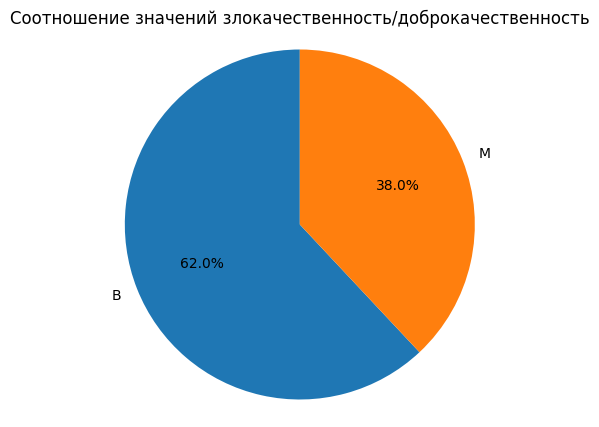

In [ ]:
# Построим круговую диаграмму распределения таргетного признака - diagnosis
diagnosis_counts = data_filtered['diagnosis'].value_counts() # Подсчет количества таргетного признака

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение значений злокачественность/доброкачественность')
plt.axis('equal')
plt.show()

Данные не сбалансированы. Здоровых в датасете больше (62%), чем онкобольных (38%)

Построим боксплоты распределения значений признаков

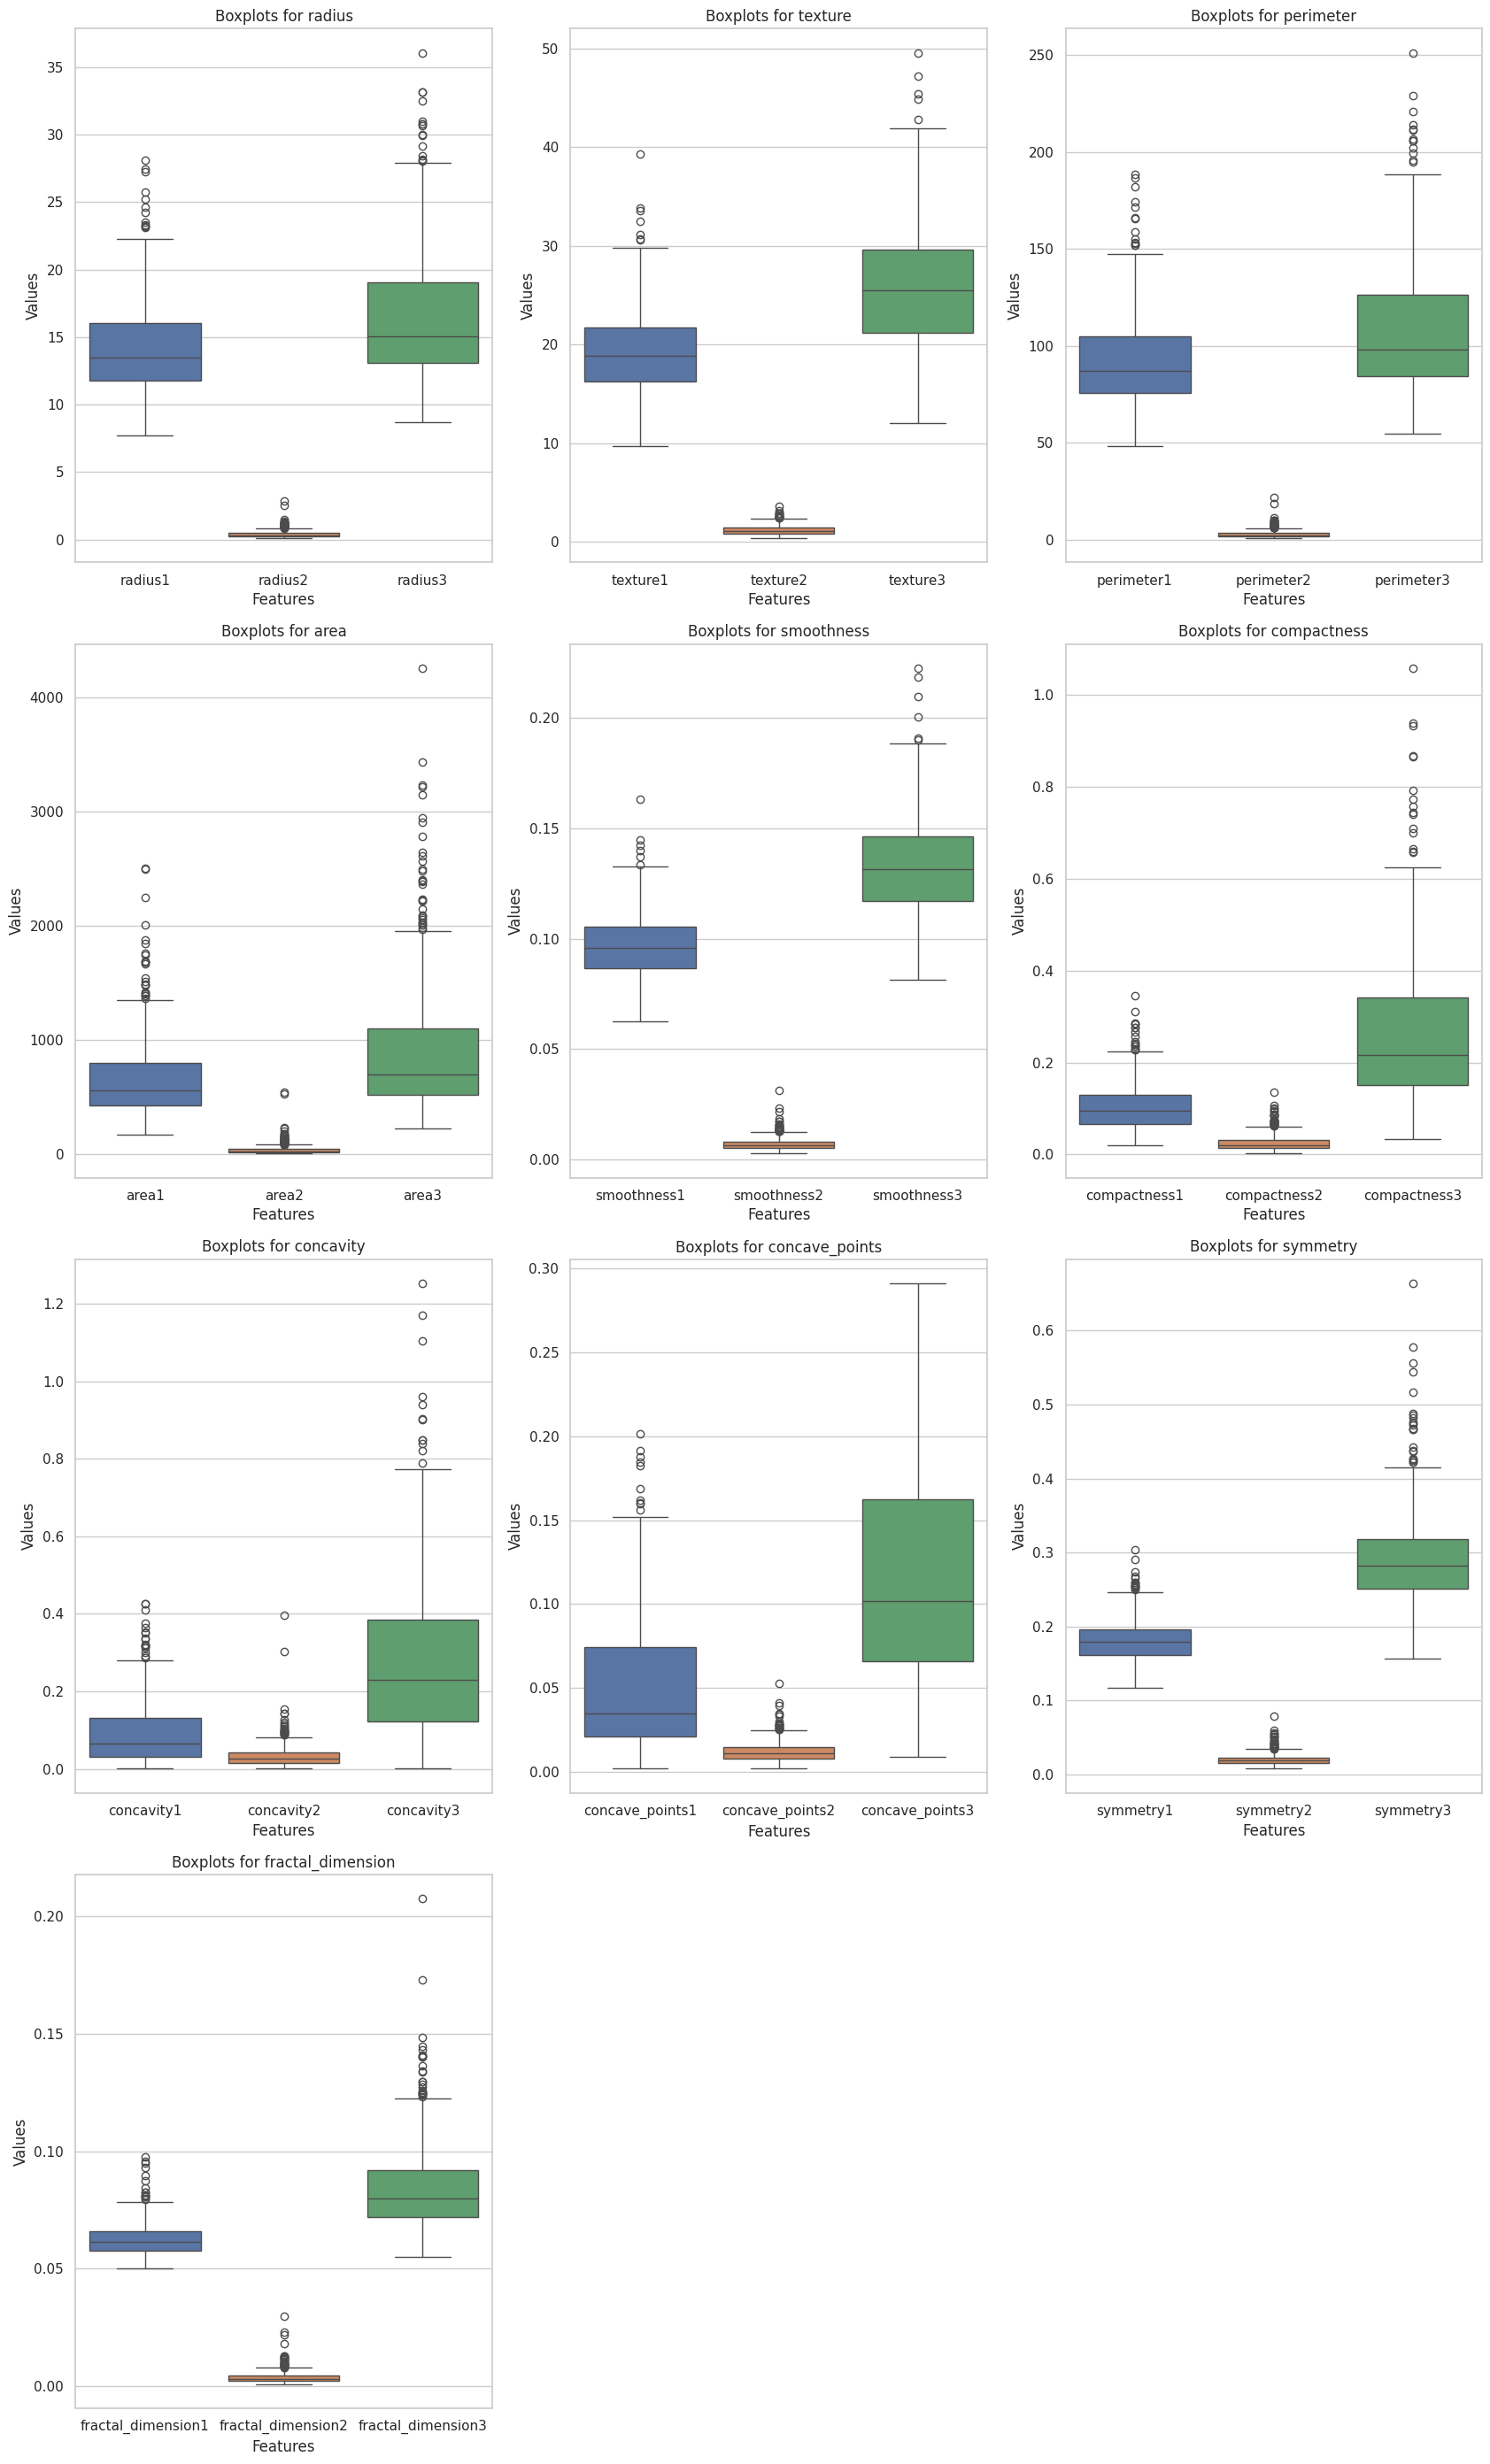

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Создаем словарь, где ключами являются признаки, а значениями - значения этих признаков
box = {
    'radius1': data_filtered['radius1'],
    'radius2': data_filtered['radius2'],
    'radius3': data_filtered['radius3'],
    'texture1': data_filtered['texture1'],
    'texture2': data_filtered['texture2'],
    'texture3': data_filtered['texture3'],
    'perimeter1': data_filtered['perimeter1'],
    'perimeter2': data_filtered['perimeter2'],
    'perimeter3': data_filtered['perimeter3'],
    'area1': data_filtered['area1'],
    'area2': data_filtered['area2'],
    'area3': data_filtered['area3'],
    'smoothness1': data_filtered['smoothness1'],
    'smoothness2': data_filtered['smoothness2'],
    'smoothness3': data_filtered['smoothness3'],
    'compactness1': data_filtered['compactness1'],
    'compactness2': data_filtered['compactness2'],
    'compactness3': data_filtered['compactness3'],
    'concavity1': data_filtered['concavity1'],
    'concavity2': data_filtered['concavity2'],
    'concavity3': data_filtered['concavity3'],
    'concave_points1': data_filtered['concave_points1'],
    'concave_points2': data_filtered['concave_points2'],
    'concave_points3': data_filtered['concave_points3'],
    'symmetry1': data_filtered['symmetry1'],
    'symmetry2': data_filtered['symmetry2'],
    'symmetry3': data_filtered['symmetry3'],
    'fractal_dimension1': data_filtered['fractal_dimension1'],
    'fractal_dimension2': data_filtered['fractal_dimension2'],
    'fractal_dimension3': data_filtered['fractal_dimension3'],
}

data_shedule = pd.DataFrame(box)

# Список систем координат
systems = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
           'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

num_plots = len(systems)

if num_plots == 1:
    axs = [axs]  # Оборачиваем в список, если только один подграфик

# Определяем количество столбцов для сетки
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Вычисляем количество строк

# Создаем подграфики
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17, 7 * num_rows))

# Визуализируем боксплоты
for i, system in enumerate(systems):
    # Получение списков признаков для данной системы
    features = [f"{system}1", f"{system}2", f"{system}3"]

    # Определяем текущий подграфик
    row = i // num_cols
    col = i % num_cols

    # Создание боксплота для данной системы
    sns.boxplot(data=data_shedule[features], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplots for {system}')
    axs[row, col].set_xlabel('Features')
    axs[row, col].set_ylabel('Values')

# Удаляем пустые подграфики
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

По всем признакам есть большое количество выбросов

Посмотрим распределения признаков по таргету - diagnosis

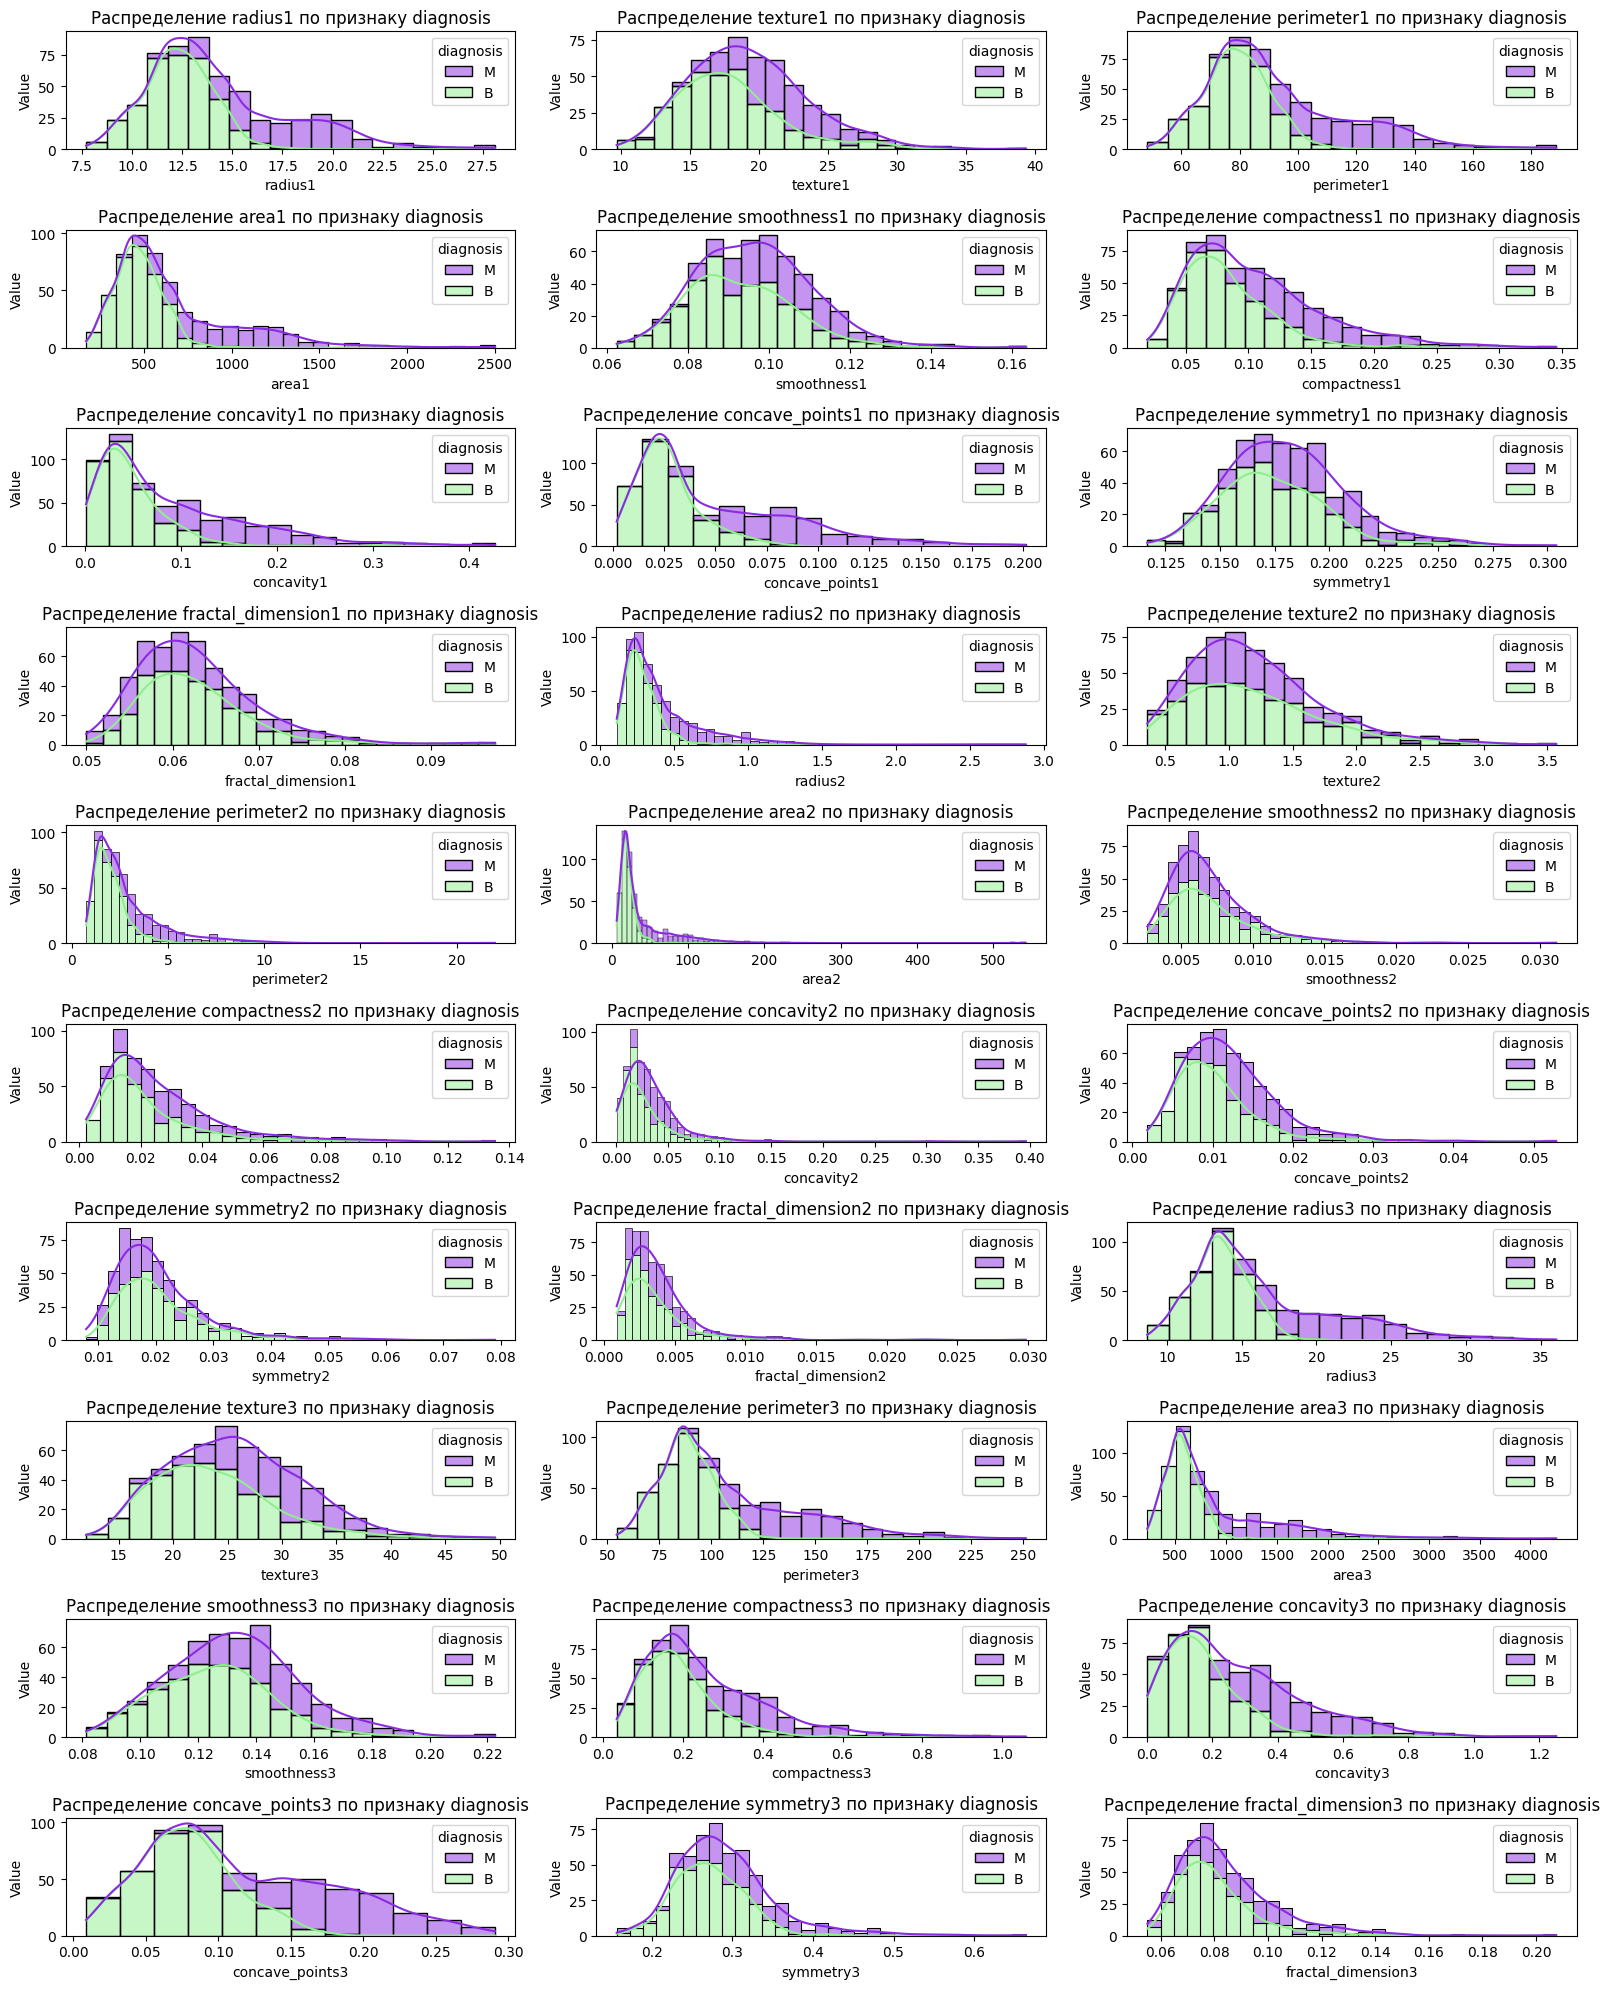

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Входные данные
hue = 'diagnosis'

plt.figure(figsize=(16, 20))

# Определяем количество строк для подграфиков
rows = (len(data_filtered.drop(hue, axis=1).columns) + 2) // 3

# Определяем палитру
custom_palette = ['#8A2BE2', '#90EE90']

# Проходим по всем столбцам, кроме столбца hue
for i, col in enumerate(data_filtered.drop(hue, axis=1).columns, 1):
    plt.subplot(rows, 3, i)

    sns.histplot(data_filtered, x=col, hue=hue, palette=custom_palette, multiple="stack", kde=True)

    plt.title(f'Распределение {col} по признаку {hue}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

По всем признакам наблюдается логнормальное распределение

Переопределим значения в таргетном столбце diagnosis

In [9]:
# Заменим значение М на 1, значение B на 0
data_filtered['diagnosis'] = data_filtered['diagnosis'].replace({'B': 0, 'M': 1})
data_filtered.head().T

,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
radius1,20.570000,19.690000,11.420000,20.290000,12.450000
texture1,17.770000,21.250000,20.380000,14.340000,15.700000
perimeter1,132.900000,130.000000,77.580000,135.100000,82.570000
area1,1326.000000,1203.000000,386.100000,1297.000000,477.100000
smoothness1,0.084740,0.109600,0.142500,0.100300,0.127800
compactness1,0.078640,0.159900,0.283900,0.132800,0.170000
concavity1,0.086900,0.197400,0.241400,0.198000,0.157800
concave_points1,0.070170,0.127900,0.105200,0.104300,0.080890
symmetry1,0.181200,0.206900,0.259700,0.180900,0.208700


Корреляционная матрица

Корреляционная матрица:
                    diagnosis   radius1  texture1  perimeter1     area1  \
diagnosis            1.000000  0.727121  0.441070    0.739902  0.703973   
radius1              0.727121  1.000000  0.349740    0.997786  0.988074   
texture1             0.441070  0.349740  1.000000    0.357289  0.343291   
perimeter1           0.739902  0.997786  0.357289    1.000000  0.987236   
area1                0.703973  0.988074  0.343291    0.987236  1.000000   
smoothness1          0.352927  0.154743  0.010937    0.192152  0.163726   
compactness1         0.588756  0.491199  0.273122    0.543313  0.485634   
concavity1           0.690422  0.666649  0.335864    0.707047  0.677696   
concave_points1      0.773487  0.817654  0.328268    0.846792  0.819465   
symmetry1            0.329845  0.147446  0.102325    0.183120  0.149817   
fractal_dimension1  -0.012659 -0.311890 -0.057063   -0.260954 -0.283940   
radius2              0.566943  0.689498  0.289494    0.702152  0.739754   
t

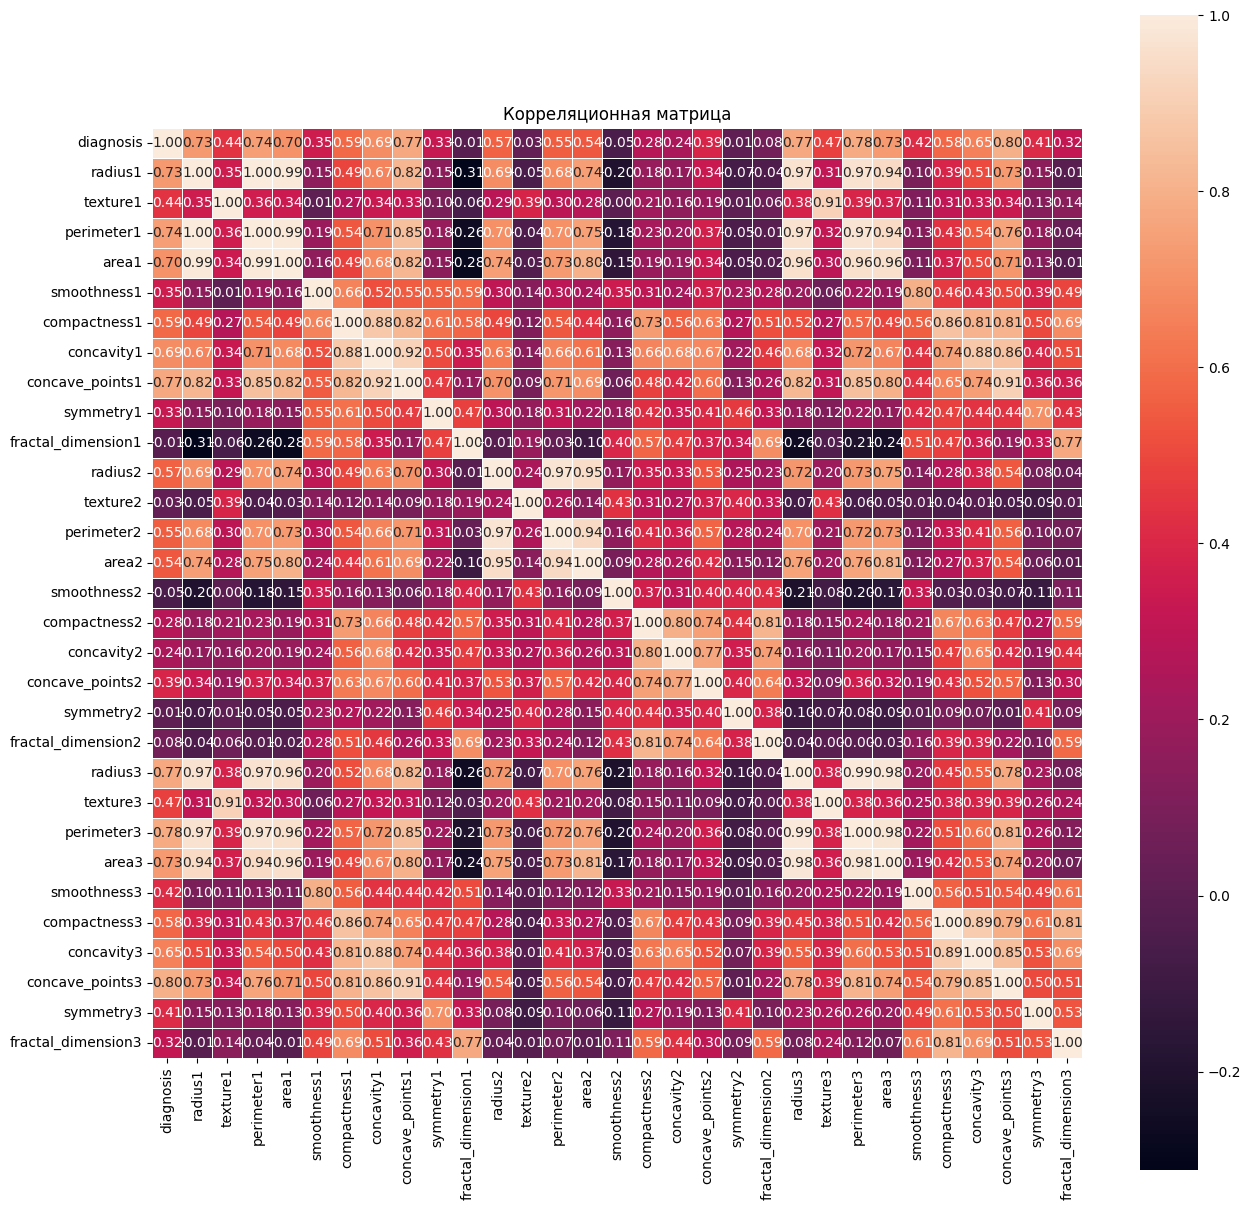

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляционную матрицу
correlation_matrix = data_filtered.corr()

# Выводим корреляционную матрицу
print("Корреляционная матрица:")
print(correlation_matrix)

# Создаем график корреляционной матрицы
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

**Анализ корреляционной матрица**
*   Мультиколлинеарные признаки из разных групп: radius1 и radius3, perimeter3, area3; texture1 и texture3; perimeter1 и radius3, area3; area1 и area2, radius3, perimeter3, area3; smoothness1 и smoothness3; compactness1 и compactness3, concavity3, concave_points3; concavity1 и concavity3, concave_points3; concave_points1 и radius3, perimeter3, area3, concave_points3, area2 и area3.  
*  Наименьшая мультиколлинеарность с признаками из других групп у вторых признаков  
*   Корреляцию признаков с таргетом и мультиколлинеарность в других группах посмотрим отдельно






Для удобства будем работать с тремя корреляционными матрицами по признакам из трех групп и таргету

Корреляционная матрица по первым признакам

Корреляционная матрица 1:
                    diagnosis   radius1  texture1  perimeter1     area1  \
diagnosis            1.000000  0.727121  0.441070    0.739902  0.703973   
radius1              0.727121  1.000000  0.349740    0.997786  0.988074   
texture1             0.441070  0.349740  1.000000    0.357289  0.343291   
perimeter1           0.739902  0.997786  0.357289    1.000000  0.987236   
area1                0.703973  0.988074  0.343291    0.987236  1.000000   
smoothness1          0.352927  0.154743  0.010937    0.192152  0.163726   
compactness1         0.588756  0.491199  0.273122    0.543313  0.485634   
concavity1           0.690422  0.666649  0.335864    0.707047  0.677696   
concave_points1      0.773487  0.817654  0.328268    0.846792  0.819465   
symmetry1            0.329845  0.147446  0.102325    0.183120  0.149817   
fractal_dimension1  -0.012659 -0.311890 -0.057063   -0.260954 -0.283940   

                    smoothness1  compactness1  concavity1  concave_points

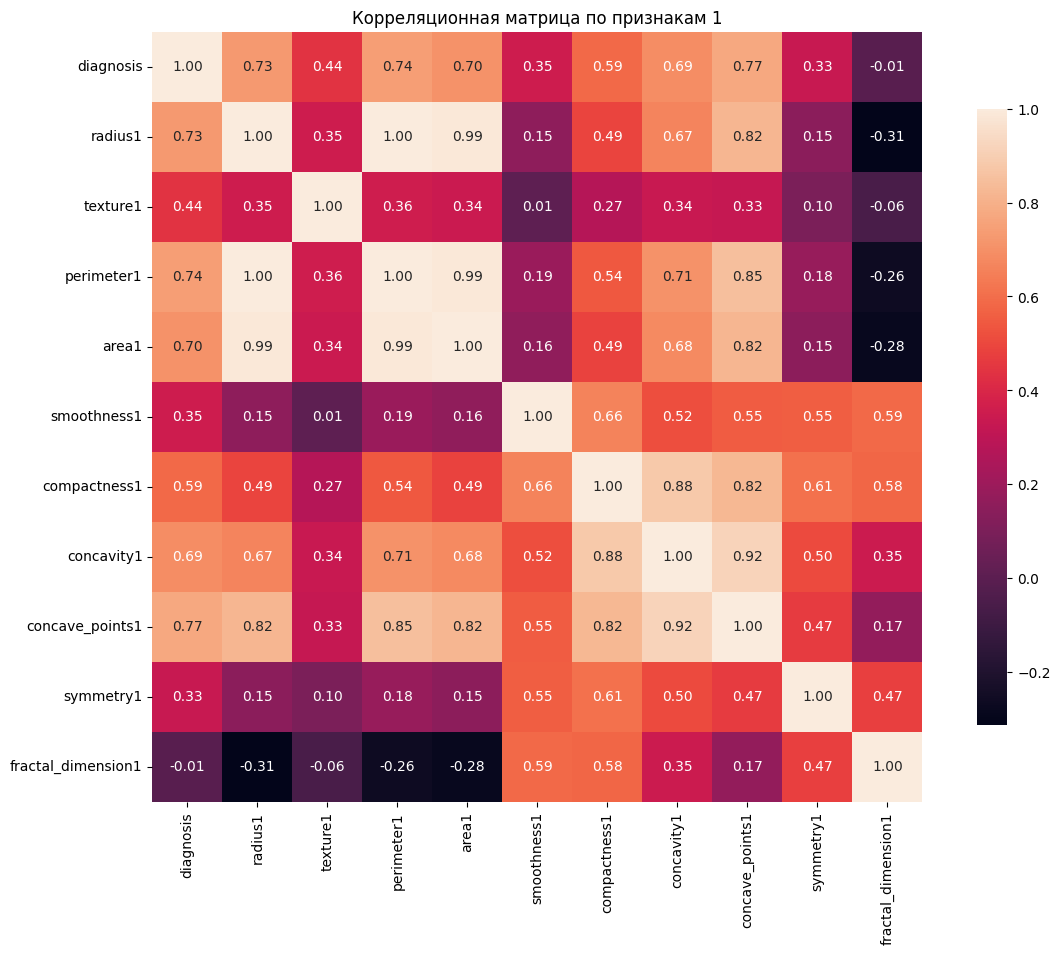

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление корреляционной матрицы по признакам 1
data_1 = data_filtered[['diagnosis',
                   'radius1',
                   'texture1',
                   'perimeter1',
                   'area1',
                   'smoothness1',
                   'compactness1',
                   'concavity1',
                   'concave_points1',
                   'symmetry1' ,
                   'fractal_dimension1']]
correlation_matrix = data_1.corr()

# Печать корреляционной матрицы
print("Корреляционная матрица 1:")
print(correlation_matrix)

# Построение тепловой карты (heatmap) для визуализации корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица по признакам 1')
plt.show()

**Анализ корреляционной матрицы**  

*   Наибольшую корреляцию с таргетом имеют признаки concave_points1 (0.77), perimeter1 (0.74), radius1(0.73), area1(0.7)
*   Наименьшую корреляцию с таргетом имеет fractal_dimension1 (0.01)
*   Есть мультиколлинеарность между признаками radius1 и area1 (0.99), radius1 и concave_points1 (0.82), compactness1 и concavity1 (0.88), compactness1 и concave_points1 (0.82), concavity1 и concave_points1 (0.92)







Корреляционная матрица 2:
                    diagnosis   radius2  texture2  perimeter2     area2  \
diagnosis            1.000000  0.566943  0.029666    0.554318  0.543716   
radius2              0.566943  1.000000  0.243065    0.972580  0.952419   
texture2             0.029666  0.243065  1.000000    0.260794  0.143953   
perimeter2           0.554318  0.972580  0.260794    1.000000  0.937428   
area2                0.543716  0.952419  0.143953    0.937428  1.000000   
smoothness2         -0.051925  0.173977  0.431478    0.162749  0.089290   
compactness2         0.279776  0.352020  0.305409    0.411589  0.275341   
concavity2           0.238320  0.331369  0.273653    0.360041  0.262806   
concave_points2      0.392658  0.528940  0.366988    0.570487  0.415207   
symmetry2            0.012723  0.251794  0.397758    0.281013  0.147528   
fractal_dimension2   0.075904  0.225200  0.328235    0.241842  0.124370   

                    smoothness2  compactness2  concavity2  concave_points

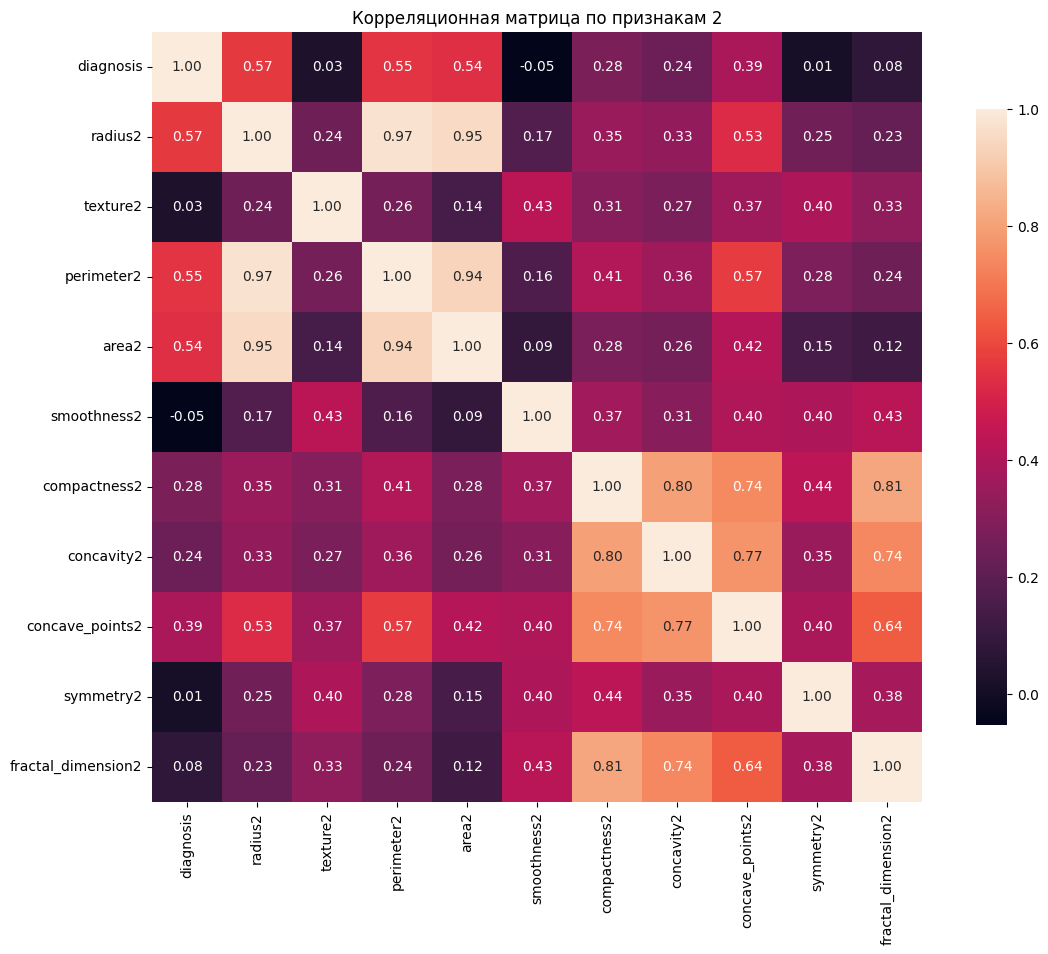

In [ ]:
# Вычисление корреляционной матрицы по признакам 2
data_2 = data_filtered[['diagnosis',
                   'radius2',
                   'texture2',
                   'perimeter2',
                   'area2',
                   'smoothness2',
                   'compactness2',
                   'concavity2',
                   'concave_points2',
                   'symmetry2' ,
                   'fractal_dimension2']]
correlation_matrix = data_2.corr()

# Печать корреляционной матрицы
print("Корреляционная матрица 2:")
print(correlation_matrix)

# Построение тепловой карты (heatmap) для визуализации корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица по признакам 2')
plt.show()

**Анализ корреляционной матрицы**  
* Наибольшую корреляцию с таргетом имеют признаки radius2 (0.57), perimeter2 (0.55), area2 (0.54)
* Наименьшую корреляцию имеют признаки symmetry2, texture2, smoothness2
* Вторые признаки хуже коррелируют с таргетом
* Высокая корреляция между radius2 и perimeter2 (0.97), radius2 и area2 (0.95), perimeter2 и area2 (0.94), compactness2 и concavity2 (0.8), compactness2 и fractal_dimension2 (0.81)






Корреляционная матрица 3:
                    diagnosis   radius3  texture3  perimeter3     area3  \
diagnosis            1.000000  0.773461  0.472906    0.780380  0.728794   
radius3              0.773461  1.000000  0.375370    0.993587  0.984480   
texture3             0.472906  0.375370  1.000000    0.382951  0.360163   
perimeter3           0.780380  0.993587  0.382951    1.000000  0.977929   
area3                0.728794  0.984480  0.360163    0.977929  1.000000   
smoothness3          0.415887  0.200457  0.250192    0.220114  0.194656   
compactness3         0.582001  0.454649  0.383578    0.509029  0.418908   
concavity3           0.652436  0.554906  0.389734    0.600308  0.526891   
concave_points3      0.796041  0.778167  0.387722    0.807898  0.741019   
symmetry3            0.410905  0.231253  0.257300    0.256136  0.195593   
fractal_dimension3   0.317341  0.079728  0.236715    0.124976  0.065967   

                    smoothness3  compactness3  concavity3  concave_points

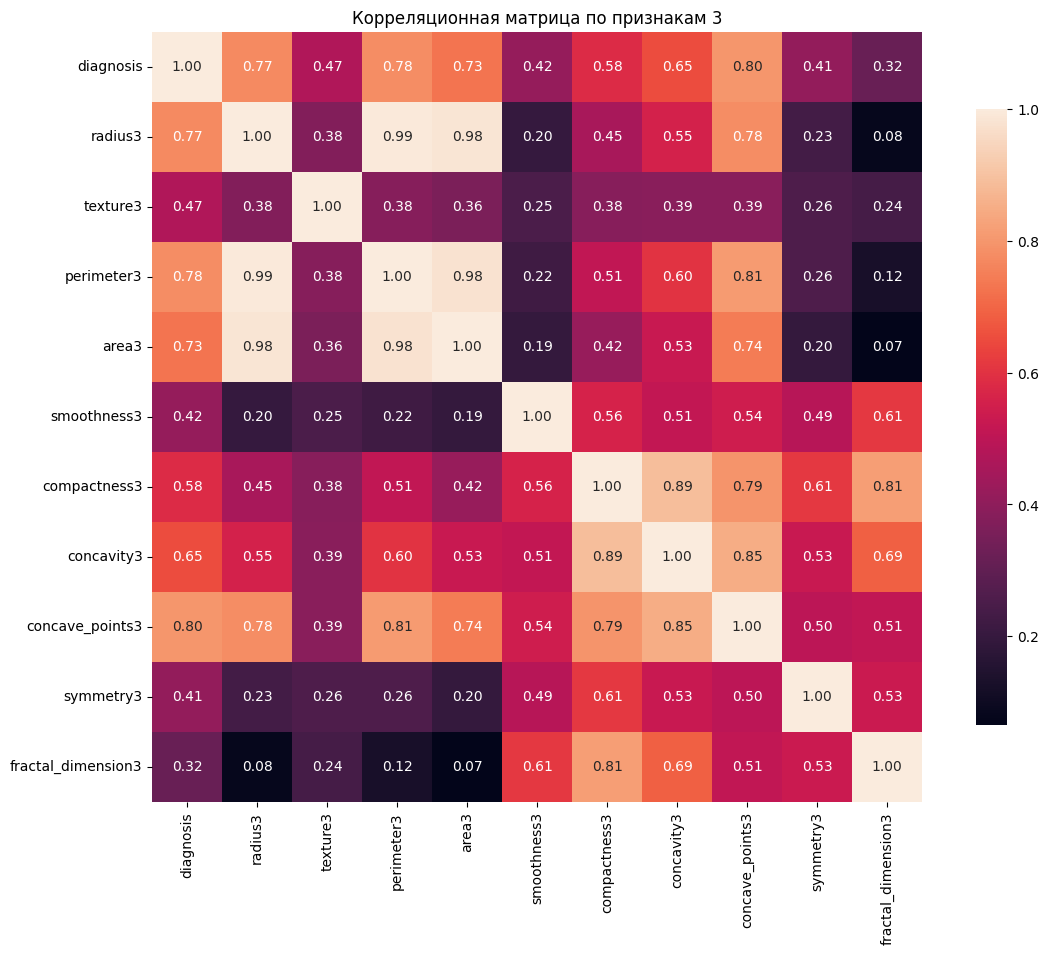

In [ ]:
# Вычисление корреляционной матрицы по признакам 3
data_3 = data_filtered[['diagnosis',
                   'radius3',
                   'texture3',
                   'perimeter3',
                   'area3',
                   'smoothness3',
                   'compactness3',
                   'concavity3',
                   'concave_points3',
                   'symmetry3' ,
                   'fractal_dimension3']]
correlation_matrix = data_3.corr()

# Печать корреляционной матрицы
print("Корреляционная матрица 3:")
print(correlation_matrix)

# Построение тепловой карты (heatmap) для визуализации корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица по признакам 3')
plt.show()

**Анализ корреляционной матрицы**
*   Наибольшая корреляция с таргетом у признаков concave_points3 (0.8), perimeter3 (0.78), radius3 (0.77), area3 (0.73)  
*   Корреляция всех третьих признаков с таргетом наибольшая в сравнении с первыми и вторыми признаками  
*   Высокая корреляция между признаками radius3 и perimeter3 (0.99) radius3 и area3 (0.98), perimeter3 и area3 (0.98), perimeter3 и concave_points3 (0.81), compactness3 и concavity3 (0.89), concavity3 и concave_points3 (0.85) compactness3 и fractal_dimension3 (0.81)
*   Третьи признаки обладают наибольшей мультиколлинеарностью





Работа с выбросами

In [ ]:
import pandas as pd

# Функция удаления выбросов
def remove_outliers(df, column, threshold):

    # Копируем DataFrame, чтобы не изменять оригинал
    filtered_df = df.copy()

    # Отфильтровываем данные, оставляя только те, которые ниже или равны порогу
    filtered_df = filtered_df[filtered_df[column] <= threshold]

    # Возвращаем отфильтрованный датафрейм
    return filtered_df

Учитывая большое количество выбросов по всем признакам и относительно небольшое количество строк, удалим самые критические выбросы

In [ ]:
# Удаляем выбросы в radius1
threshold_value = 27
selected_column = 'radius1'

# Применяем функцию
data_cleaned_r1 = remove_outliers(data_filtered, selected_column, threshold_value)
data_cleaned_r1.shape

(552, 31)

In [ ]:
# Удаляем выбросы в radius2
threshold_value = 1.5
selected_column = 'radius2'

# Применяем функцию
data_cleaned_r2 = remove_outliers(data_cleaned_r1, selected_column, threshold_value)
data_cleaned_r2.shape

(551, 31)

In [ ]:
# Удаляем выбросы в radius3
threshold_value = 33
selected_column = 'radius3'

# Применяем функцию
data_cleaned_r3 = remove_outliers(data_cleaned_r2, selected_column, threshold_value)
data_cleaned_r3.shape

(550, 31)

In [ ]:
# Удаляем выбросы в texture1
threshold_value = 35
selected_column = 'texture1'

# Применяем функцию
data_cleaned_t1 = remove_outliers(data_cleaned_r3, selected_column, threshold_value)
data_cleaned_t1.shape

(549, 31)

In [ ]:
# Удаляем выбросы в perimeter2
threshold_value = 10
selected_column = 'perimeter2'

# Применяем функцию
data_cleaned_p2 = remove_outliers(data_cleaned_t1, selected_column, threshold_value)
data_cleaned_p2.shape

(546, 31)

In [ ]:
# Удаляем выбросы в perimeter3
threshold_value = 210
selected_column = 'perimeter3'

# Применяем функцию
data_cleaned_p3 = remove_outliers(data_cleaned_p2, selected_column, threshold_value)
data_cleaned_p3.shape

(543, 31)

In [ ]:
# Удаляем выбросы в area1
threshold_value = 1800
selected_column = 'area1'

# Применяем функцию
data_cleaned_a1 = remove_outliers(data_cleaned_p3, selected_column, threshold_value)
data_cleaned_a1.shape

(542, 31)

In [ ]:
# Удаляем выбросы в area2
threshold_value = 200
selected_column = 'area2'

# Применяем функцию
data_cleaned_a2 = remove_outliers(data_cleaned_a1, selected_column, threshold_value)
data_cleaned_a2.shape

(541, 31)

In [ ]:
# Удаляем выбросы в area3
threshold_value = 2900
selected_column = 'area3'

# Применяем функцию
data_cleaned_a3 = remove_outliers(data_cleaned_a2, selected_column, threshold_value)
data_cleaned_a3.shape

(539, 31)

In [ ]:
# Удаляем выбросы в smoothness1
threshold_value = 0.15
selected_column = 'smoothness1'

# Применяем функцию
data_cleaned_s1 = remove_outliers(data_cleaned_a3, selected_column, threshold_value)
data_cleaned_s1.shape

(538, 31)

In [ ]:
# Удаляем выбросы в smoothness2
threshold_value = 0.025
selected_column = 'smoothness2'

# Применяем функцию
data_cleaned_s2 = remove_outliers(data_cleaned_s1, selected_column, threshold_value)
data_cleaned_s2.shape

(537, 31)

In [ ]:
# Удаляем выбросы в smoothness3
threshold_value = 0.21
selected_column = 'smoothness3'

# Применяем функцию
data_cleaned_s3 = remove_outliers(data_cleaned_s2, selected_column, threshold_value)
data_cleaned_s3.shape

(535, 31)

In [ ]:
# Удаляем выбросы в compactness1
threshold_value = 0.3
selected_column = 'compactness1'

# Применяем функцию
data_cleaned_c1 = remove_outliers(data_cleaned_s3, selected_column, threshold_value)
data_cleaned_c1.shape

(534, 31)

In [ ]:
# Удаляем выбросы в compactness2
threshold_value = 0.1
selected_column = 'compactness2'

# Применяем функцию
data_cleaned_c2 = remove_outliers(data_cleaned_c1, selected_column, threshold_value)
data_cleaned_c2.shape

(531, 31)

In [ ]:
# Удаляем выбросы в compactness3
threshold_value = 0.8
selected_column = 'compactness3'

# Применяем функцию
data_cleaned_c3 = remove_outliers(data_cleaned_c2, selected_column, threshold_value)
data_cleaned_c3.shape

(528, 31)

In [ ]:
# Удаляем выбросы в concavity1
threshold_value = 0.4
selected_column = 'concavity1'

# Применяем функцию
data_cleaned_conc1 = remove_outliers(data_cleaned_c3, selected_column, threshold_value)
data_cleaned_conc1.shape

(527, 31)

In [ ]:
# Удаляем выбросы в concavity2
threshold_value = 0.3
selected_column = 'concavity2'

# Применяем функцию
data_cleaned_conc2 = remove_outliers(data_cleaned_conc1, selected_column, threshold_value)
data_cleaned_conc2.shape

(526, 31)

In [ ]:
# Удаляем выбросы в concavity3
threshold_value = 1.0
selected_column = 'concavity3'

# Применяем функцию
data_cleaned_conc3 = remove_outliers(data_cleaned_conc2, selected_column, threshold_value)
data_cleaned_conc3.shape

(525, 31)

In [ ]:
# Удаляем выбросы в concave_points1
threshold_value = 0.16
selected_column = 'concave_points1'

# Применяем функцию
data_cleaned_cp1 = remove_outliers(data_cleaned_conc3, selected_column, threshold_value)
data_cleaned_cp1.shape

(524, 31)

In [ ]:
# Удаляем выбросы в concave_points2
threshold_value = 0.034
selected_column = 'concave_points2'

# Применяем функцию
data_cleaned_cp2 = remove_outliers(data_cleaned_cp1, selected_column, threshold_value)
data_cleaned_cp2.shape

(522, 31)

In [ ]:
# Удаляем выбросы в symmetry1
threshold_value = 0.3
selected_column = 'symmetry1'

# Применяем функцию
data_cleaned_sym1 = remove_outliers(data_cleaned_cp2, selected_column, threshold_value)
data_cleaned_sym1.shape

(521, 31)

In [ ]:
# Удаляем выбросы в symmetry2
threshold_value = 0.055
selected_column = 'symmetry2'

# Применяем функцию
data_cleaned_sym2 = remove_outliers(data_cleaned_sym1, selected_column, threshold_value)
data_cleaned_sym2.shape

(519, 31)

In [ ]:
# Удаляем выбросы в symmetry3
threshold_value = 0.5
selected_column = 'symmetry3'

# Применяем функцию
data_cleaned_sym3 = remove_outliers(data_cleaned_sym2, selected_column, threshold_value)
data_cleaned_sym3.shape

(518, 31)

Очищенный от критических выбросов датафрейм содержит 518 записей. Сохраним его в переменную data_new

In [ ]:
data_new = data_cleaned_sym3
data_new.head().T

,0,1,3,4,5
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
radius1,20.570000,19.690000,20.290000,12.450000,18.250000
texture1,17.770000,21.250000,14.340000,15.700000,19.980000
perimeter1,132.900000,130.000000,135.100000,82.570000,119.600000
area1,1326.000000,1203.000000,1297.000000,477.100000,1040.000000
smoothness1,0.084740,0.109600,0.100300,0.127800,0.094630
compactness1,0.078640,0.159900,0.132800,0.170000,0.109000
concavity1,0.086900,0.197400,0.198000,0.157800,0.112700
concave_points1,0.070170,0.127900,0.104300,0.080890,0.074000
symmetry1,0.181200,0.206900,0.180900,0.208700,0.179400


Построим корреляционную матрицу по трем группам признаков очищенного от критических выбросов датафрейма

Корреляционная матрица:
                    diagnosis   radius1  texture1  perimeter1     area1  \
diagnosis            1.000000  0.742235  0.413299    0.756782  0.744050   
radius1              0.742235  1.000000  0.317920    0.997923  0.992572   
texture1             0.413299  0.317920  1.000000    0.325462  0.324197   
perimeter1           0.756782  0.997923  0.325462    1.000000  0.991089   
area1                0.744050  0.992572  0.324197    0.991089  1.000000   
smoothness1          0.319478  0.104015 -0.016868    0.139466  0.105676   
compactness1         0.574675  0.469556  0.235832    0.521289  0.466733   
concavity1           0.721223  0.660442  0.318774    0.700925  0.669431   
concave_points1      0.788755  0.797466  0.292534    0.826752  0.802902   
symmetry1            0.296616  0.117131  0.079252    0.145394  0.122680   
fractal_dimension1  -0.064067 -0.369526 -0.078273   -0.322108 -0.347389   
radius2              0.618321  0.639431  0.301454    0.649621  0.671148   
t

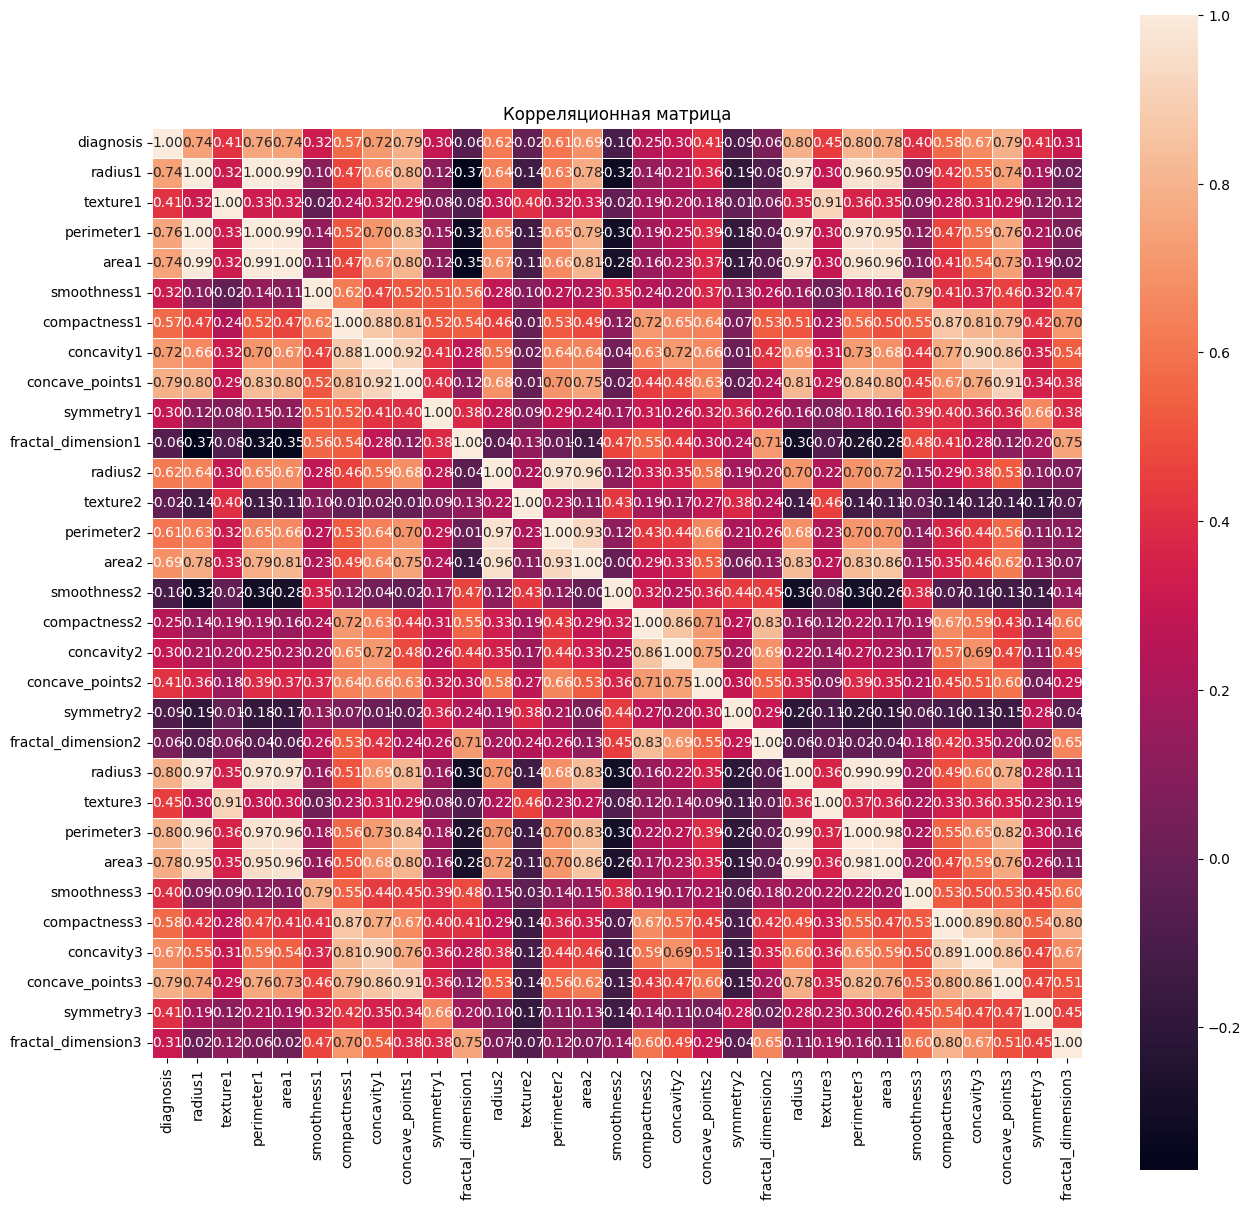

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляционную
correlation_matrix = data_new.corr()

# Выводим корреляционную матрицу
print("Корреляционная матрица:")
print(correlation_matrix)

# Создаем график корреляционной матрицы
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

**Анализ корреляционной матрицы**
*   Снизилась корреляция между radius1 и radius3, area3; smoothness1 и smoothness3; compactness1 и  concave_points3; concave_points1 и radius3, perimeter3,

*   Некритично повысилась корреляция между radius1 и area3, perimeter1 и area3, area1 и area2, radius3; compactness1 и compactness3: concavity1 и concavity3
*   Увеличилась корреляция между concavity1 и concave_points3, area2 и area3  
*   Высокая корреляция между другими признаками из разных групп не изменилась  
*   Корреляцию признаков с таргетом и мультиколлинеарность признаков одной группы посмотрим отдельно

Корреляционная матрица 1:
                    diagnosis   radius1  texture1  perimeter1     area1  \
diagnosis            1.000000  0.742235  0.413299    0.756782  0.744050   
radius1              0.742235  1.000000  0.317920    0.997923  0.992572   
texture1             0.413299  0.317920  1.000000    0.325462  0.324197   
perimeter1           0.756782  0.997923  0.325462    1.000000  0.991089   
area1                0.744050  0.992572  0.324197    0.991089  1.000000   
smoothness1          0.319478  0.104015 -0.016868    0.139466  0.105676   
compactness1         0.574675  0.469556  0.235832    0.521289  0.466733   
concavity1           0.721223  0.660442  0.318774    0.700925  0.669431   
concave_points1      0.788755  0.797466  0.292534    0.826752  0.802902   
symmetry1            0.296616  0.117131  0.079252    0.145394  0.122680   
fractal_dimension1  -0.064067 -0.369526 -0.078273   -0.322108 -0.347389   

                    smoothness1  compactness1  concavity1  concave_points

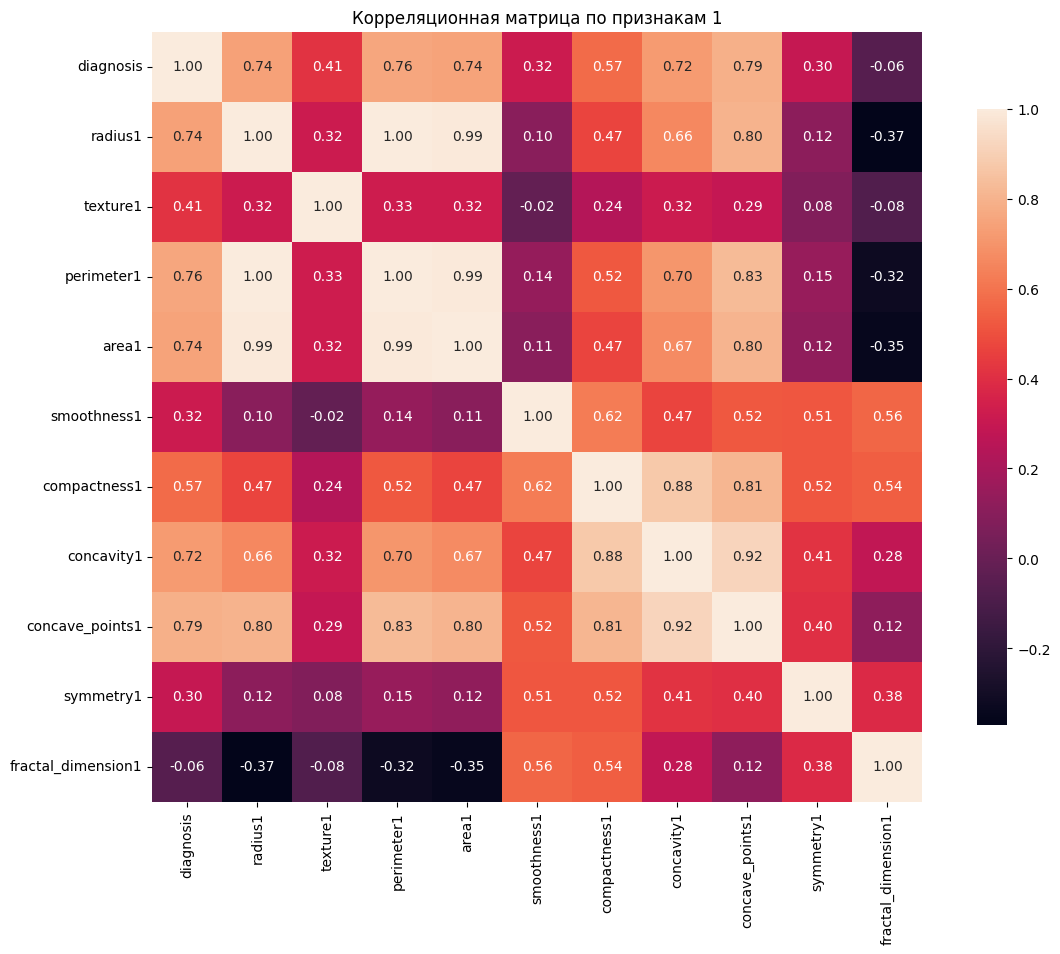

In [ ]:
# Вычисление корреляционной матрицы по признакам 1
data_new1 = data_new[['diagnosis',
                   'radius1',
                   'texture1',
                   'perimeter1',
                   'area1',
                   'smoothness1',
                   'compactness1',
                   'concavity1',
                   'concave_points1',
                   'symmetry1' ,
                   'fractal_dimension1']]
correlation_matrix = data_new1.corr()

# Печать корреляционной матрицы
print("Корреляционная матрица 1:")
print(correlation_matrix)

# Построение тепловой карты (heatmap) для визуализации корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица по признакам 1')
plt.show()

**Анализ изменений корреляционной матрицы**  
* Уменьшилась корреляция между radius1 и concave_points1, perimeter1 и concave_points1, area1 и concave_points1, compactness1 и concave_points1. Взаимодействие других признаков не изменилось
* Признаки с высокой и низкой корреляцией с таргетом не изменились




Корреляционная матрица 2:
                    diagnosis   radius2  texture2  perimeter2     area2  \
diagnosis            1.000000  0.618321 -0.020242    0.608957  0.687001   
radius2              0.618321  1.000000  0.215201    0.966291  0.958003   
texture2            -0.020242  0.215201  1.000000    0.225471  0.107921   
perimeter2           0.608957  0.966291  0.225471    1.000000  0.929392   
area2                0.687001  0.958003  0.107921    0.929392  1.000000   
smoothness2         -0.102560  0.124852  0.430860    0.123333 -0.001763   
compactness2         0.249395  0.326522  0.194620    0.428063  0.289413   
concavity2           0.298433  0.345980  0.173422    0.439648  0.327186   
concave_points2      0.413386  0.582951  0.274212    0.656747  0.531005   
symmetry2           -0.086664  0.191892  0.375874    0.208204  0.059230   
fractal_dimension2   0.060045  0.202361  0.242653    0.262527  0.130197   

                    smoothness2  compactness2  concavity2  concave_points

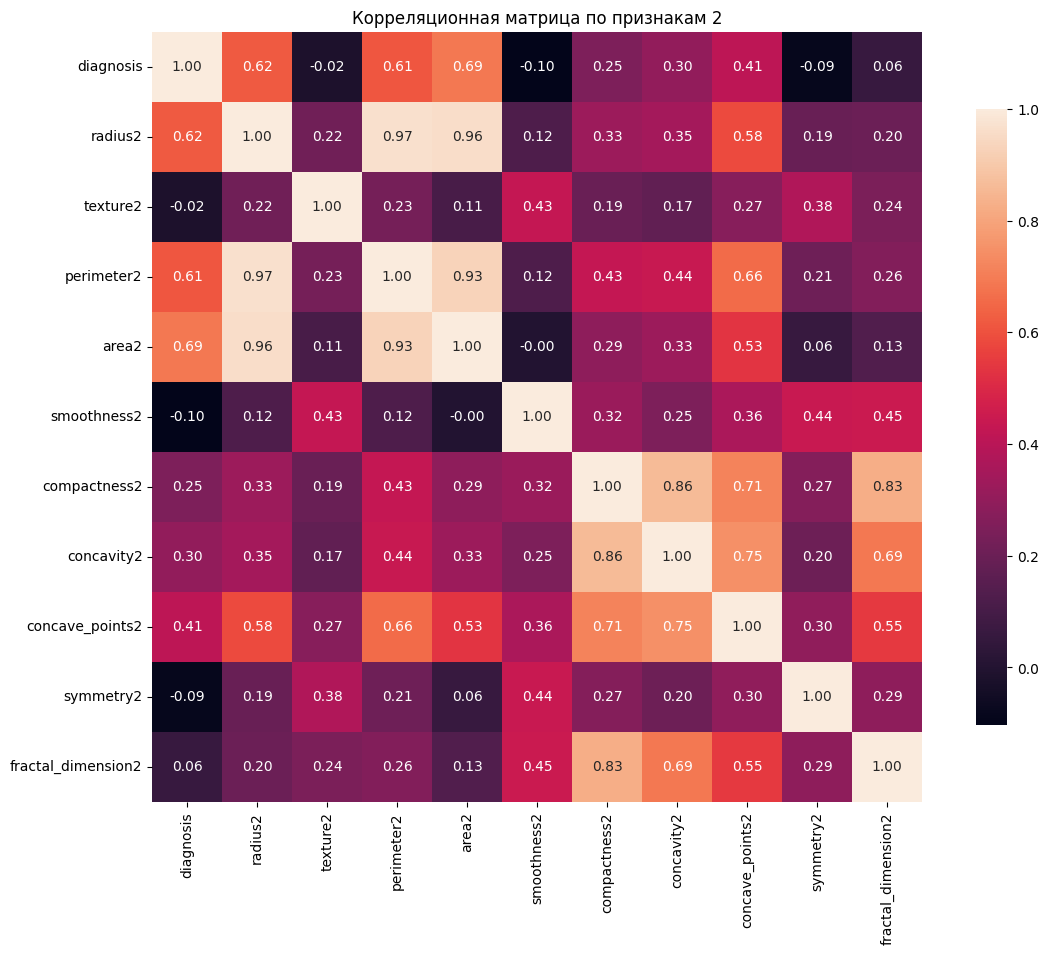

In [ ]:
# Вычисление корреляционной матрицы по признакам 2
data_new2 = data_new[['diagnosis',
                   'radius2',
                   'texture2',
                   'perimeter2',
                   'area2',
                   'smoothness2',
                   'compactness2',
                   'concavity2',
                   'concave_points2',
                   'symmetry2' ,
                   'fractal_dimension2']]
correlation_matrix = data_new2.corr()

# Печать корреляционной матрицы
print("Корреляционная матрица 2:")
print(correlation_matrix)

# Построение тепловой карты (heatmap) для визуализации корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица по признакам 2')
plt.show()

**Анализ изменений корреляционной матрицы**  
*   Корреляция с таргетом: заметно увеличилась корреляция признаков, которые обладали наибольшей корреляцией
*   Некритично увеличилась корреляция между radius2 и area2, между fractal_dimension2 и compactness2
*   Уменьшилась корреляция между perimeter2 и area2, compactness2 и concavity2, compactness2 и fractal_dimension2






Корреляционная матрица 3:
                    diagnosis   radius3  texture3  perimeter3     area3  \
diagnosis            1.000000  0.795102  0.446604    0.804502  0.779207   
radius3              0.795102  1.000000  0.358422    0.993317  0.990263   
texture3             0.446604  0.358422  1.000000    0.366944  0.356588   
perimeter3           0.804502  0.993317  0.366944    1.000000  0.982781   
area3                0.779207  0.990263  0.356588    0.982781  1.000000   
smoothness3          0.400568  0.196523  0.218932    0.216141  0.200452   
compactness3         0.577036  0.491849  0.330888    0.549220  0.474412   
concavity3           0.670925  0.604505  0.356890    0.651815  0.590524   
concave_points3      0.788505  0.784589  0.349321    0.815374  0.764728   
symmetry3            0.405650  0.276630  0.229971    0.295362  0.257271   
fractal_dimension3   0.307319  0.112947  0.190907    0.162236  0.114993   

                    smoothness3  compactness3  concavity3  concave_points

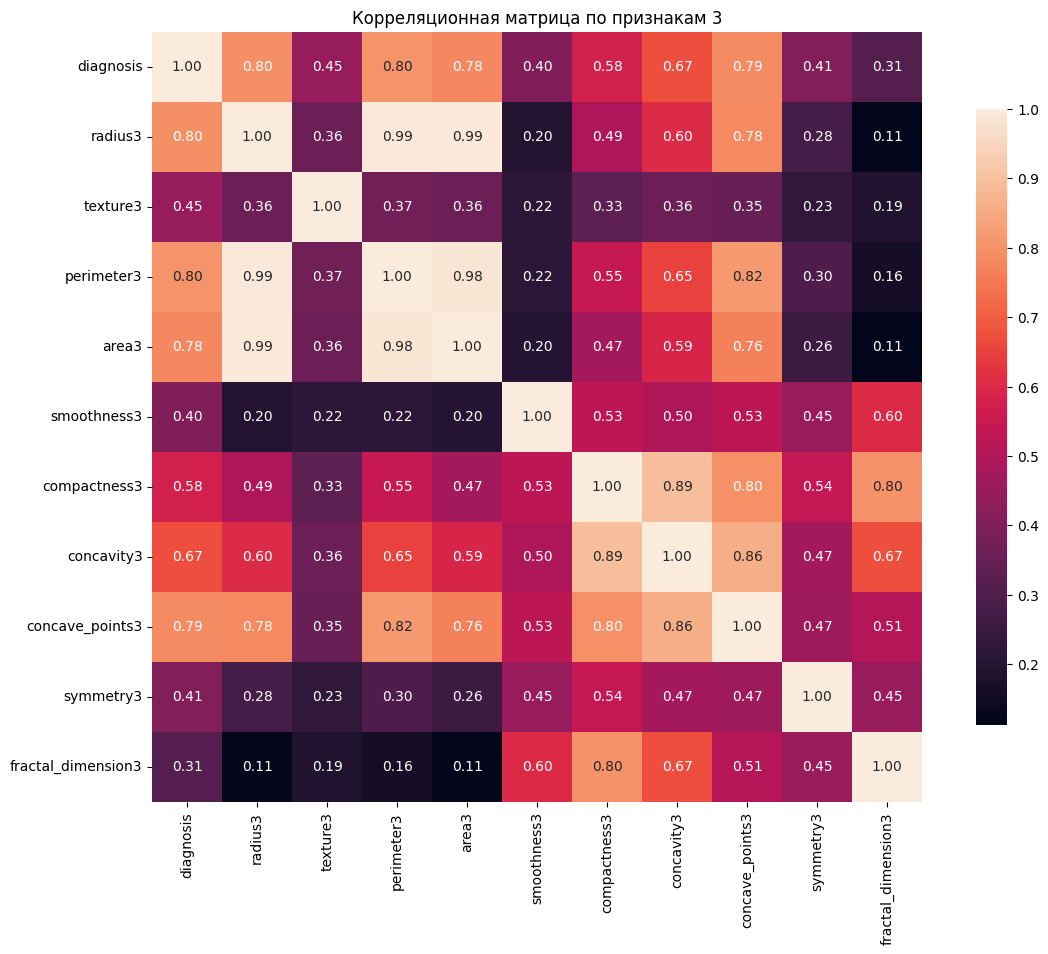

In [ ]:
# Вычисление корреляционной матрицы по признакам 3
data_new3 = data_new[['diagnosis',
                   'radius3',
                   'texture3',
                   'perimeter3',
                   'area3',
                   'smoothness3',
                   'compactness3',
                   'concavity3',
                   'concave_points3',
                   'symmetry3' ,
                   'fractal_dimension3']]
correlation_matrix = data_new3.corr()

# Печать корреляционной матрицы
print("Корреляционная матрица 3:")
print(correlation_matrix)

# Построение тепловой карты (heatmap) для визуализации корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица по признакам 3')
plt.show()

**Анализ изменений корреляционной матрицы**  
*   Наибольшая корреляция признаков с таргетом (radius3, perimeter3, area3) стала еще выше, а корреляция concave_points3 с таргетом некритично снизилась
*  Некритично увеличилась корреляция perimeter3 и area3, perimeter3 и concave_points3, fractal_dimension3 и compactness3, увеличилась корреляция compactness3 и concave_points3, concavity3 и concave_points3, concave_points3 и perimeter3,



**Заключение**  
Результаты корреляции признаков до и после изменений противоречивы, есть признаки как с повышением значений корреляции, так и с уменьшением. Учитывая, что некоторые модели ML неустойчивы к выбросам, попробуем взять для обучения датафрейм data_new, очищенный от нулевых значений и критических выбросов

Сохраним в csv-файлы обработанные датафреймы

In [ ]:
file_path = 'https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data_new.csv'

# Сохранение DataFrame в CSV файл
data_new.to_csv(file_path, index=False)
print(f'Файл сохранен в: {file_path}')

In [ ]:
file_path = 'https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data_filtered.csv'

# Сохранение DataFrame в CSV файл
data_filtered.to_csv(file_path, index=False)
print(f'Файл сохранен в: {file_path}')